In [2]:
cd /home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection

/home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection


In [3]:
#Import standard modules
%run lib/__init__.py
%matplotlib inline

### Project 3: Madelon Dataset - Feature Selection + Classification

### Step 2. Feature Selection - SelectJbest

### Select J(oshs's) Best METHOD -  a type of multivariate filter technique

Assumptions : 
* For this very specific model designed for use with the Madelon dataset the assumptions are:-
       * for the 'noise' features : there should be low prediction rate as feature values generated randomly
       * for the 'informative' features : there should be some level of prediciton from redundant features , but not as strong as for the redundant features
       * for the  'redunant' features: there should be a higher prediction rate as they were created from a combination of the other core features. 
       * In addition assume  a single function used to create all values for each of the redundant features. If each of the redundant feature values  was created from a random combination of informative features then the prediction rate will be low.

We should observe  3 different populations in the prediction rates of the features and we will use these  to determine the features to select. Assuming adequate seperation of the popoulations : -
    * Reduntant features = The 15 features with the highest scores 
    * Informative features = The 5 features with scores between the highest 16 and the highest 20.

Hyperparatmeters : 
    * Esimator: any regression model can be used. 
        * We will the RidgeCV Linear Regression model with l2 regularization, and cross fold validation 
        

In [4]:
#Load files names for datasets
pickle_files=Pickle_files()
datafiles=pickle_files.read_datafiles()

In [5]:
def calculate_score_for_feature(X,feature,model):

    tmp_X=X.drop(feature , axis=1)
    tmp_y=X[feature]
    X_train, X_test,y_train,y_test=train_test_split(tmp_X, tmp_y,test_size=.25)
    
    ss=StandardScaler()
    X_train_s=ss.fit_transform(X_train)
    X_test_s=ss.transform(X_test)
    
    regressor=model
    regressor.fit(X_train_s,y_train)
    
    score=regressor.score(X_test_s,y_test)
    
    return score

def mean_score_for_feature(X,feature,model,runs=5):
    
    score=[]
    for _ in range(runs):
        score.append(calculate_score_for_feature(X,feature,model))
    
    return np.mean(score)

In [6]:
X=pd.read_pickle(datafiles['UCI'][0])

In [7]:
%%time
sjb_results_LR={}
for feat in X.columns:
    sjb_results_LR[feat]=mean_score_for_feature(X, feat, LinearRegression() )

CPU times: user 9min 34s, sys: 9min 57s, total: 19min 32s
Wall time: 4min 53s


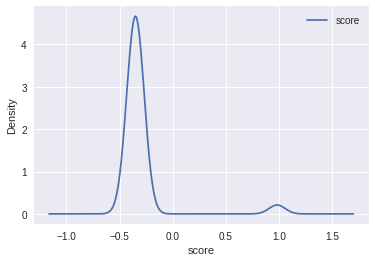

In [8]:
len(sjb_results_LR)
sjb_results_LR_df=pd.DataFrame(sjb_results_LR, index=['score']).T.sort_values('score', ascending=False)
sjb_results_LR_df.plot.kde()
plt.xlabel('score')

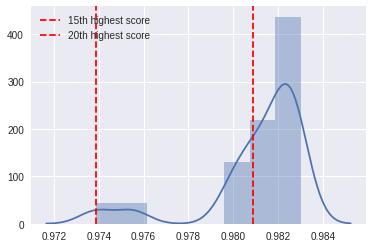

In [14]:
#lets look at 20 highhest Var 
sns.distplot(sjb_results_LR_df.head(20))
plt.axvline(sjb_results_LR_df.iloc[14,0], c='r', ls='--', label='15th highest score')
plt.axvline(sjb_results_LR_df.iloc[19,0], c='r', ls='--', label='20th highest score')
plt.legend()

In [23]:
Inform_feat=sjb_results_LR_df.iloc[15:20]
Inform_feat

,score
318,0.980392
451,0.979997
455,0.979858
378,0.975512
48,0.973872


In [22]:
redun_feat=sjb_results_LR_df.iloc[0:15]
redun_feat

,score
64,0.983029
105,0.982833
338,0.982760
128,0.982569
472,0.982536
442,0.982460
453,0.982417
493,0.982403
475,0.982248
336,0.982207
